## CMPINF 2100 Week 09

### Review KMeans AND introduce HCLUST

## Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

Import functions from `sklearn` to support KMeans.

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.decomposition import PCA

In [4]:
from sklearn.cluster import KMeans

## Read data

In [5]:
wine_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'

In [6]:
wine_names = ['Cultivar', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanin', 'Color_intensity', 'Hue', 'OD280_OD315', 'Proline']

In [7]:
wine_data = pd.read_csv( wine_url, names=wine_names )

In [8]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cultivar              178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic_acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalinity_of_ash     178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total_phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid_phenols  178 non-null    float64
 9   Proanthocyanin        178 non-null    float64
 10  Color_intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD280_OD315           178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [9]:
wine_data.nunique()

Cultivar                  3
Alcohol                 126
Malic_acid              133
Ash                      79
Alcalinity_of_ash        63
Magnesium                53
Total_phenols            97
Flavanoids              132
Nonflavanoid_phenols     39
Proanthocyanin          101
Color_intensity         132
Hue                      78
OD280_OD315             122
Proline                 121
dtype: int64

In [10]:
wine_data.Cultivar.value_counts()

2    71
1    59
3    48
Name: Cultivar, dtype: int64

In [11]:
wine_data['Cultivar'] = wine_data.Cultivar.astype('category')

In [12]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Cultivar              178 non-null    category
 1   Alcohol               178 non-null    float64 
 2   Malic_acid            178 non-null    float64 
 3   Ash                   178 non-null    float64 
 4   Alcalinity_of_ash     178 non-null    float64 
 5   Magnesium             178 non-null    int64   
 6   Total_phenols         178 non-null    float64 
 7   Flavanoids            178 non-null    float64 
 8   Nonflavanoid_phenols  178 non-null    float64 
 9   Proanthocyanin        178 non-null    float64 
 10  Color_intensity       178 non-null    float64 
 11  Hue                   178 non-null    float64 
 12  OD280_OD315           178 non-null    float64 
 13  Proline               178 non-null    int64   
dtypes: category(1), float64(11), int64(2)
memory usage: 18.5 K

## Preprocess

Before we can execute KMeans we NEED to remove the MAGNITUDE and SCALE effects!!!!

We need to standardize the numeric columns BEFORE we can cluster!

In [13]:
wine_features = wine_data.select_dtypes('number').copy()

In [14]:
wine_features.columns

Index(['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium',
       'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanin',
       'Color_intensity', 'Hue', 'OD280_OD315', 'Proline'],
      dtype='object')

In [15]:
wine_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Alcalinity_of_ash     178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_phenols  178 non-null    float64
 8   Proanthocyanin        178 non-null    float64
 9   Color_intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280_OD315           178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


Let's now standardize the numeric columns

In [16]:
Xwine = StandardScaler().fit_transform( wine_features )

In [17]:
Xwine.shape

(178, 13)

In [18]:
type( Xwine )

numpy.ndarray

Execute PCA to support and streamline visualizations.

In [19]:
pca_wine = PCA(n_components=2).fit_transform( Xwine )

In [20]:
pca_wine.shape

(178, 2)

These are NEW variables that were created based on the original standardized features!

In [21]:
pca_wine_df = pd.DataFrame( pca_wine, columns=['pc01', 'pc02'] )

In [22]:
pca_wine_df

,pc01,pc02
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831
...,...,...
173,-3.370524,-2.216289
174,-2.601956,-1.757229
175,-2.677839,-2.760899
176,-2.387017,-2.297347


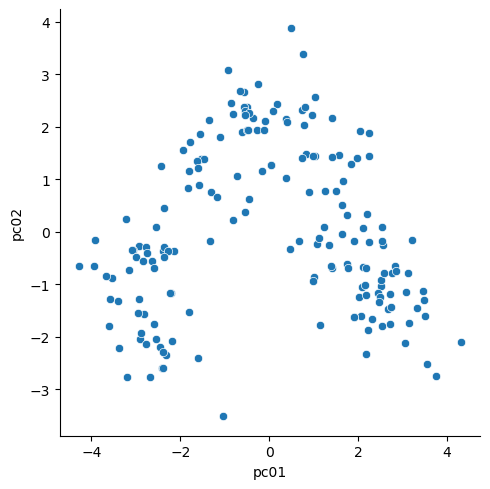

In [23]:
sns.relplot(data = pca_wine_df, x='pc01', y='pc02')

plt.show()

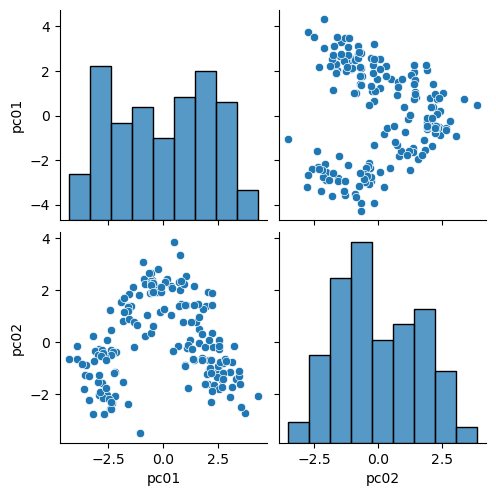

In [24]:
sns.pairplot(data = pca_wine_df)

plt.show()

## KMeans

Last week, we saw how to execute KMeans using 3 clusters.

This week, let's identify the OPTIMAL number of clusters using the KNEE BEND plot!!!

We need to calculate the TOTAL WITHIN SUM OF SQUARES for many possible number of clusters!

In [25]:
tots_within = []

K = range(1, 31)

for k in K:
    km = KMeans(n_clusters=k, random_state=121, n_init=25, max_iter=500).fit( Xwine )
    
    tots_within.append( km.inertia_ )

C:\Users\jyurk\anaconda3\envs\cmpinf2100\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jyurk\anaconda3\envs\cmpinf2100\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jyurk\anaconda3\envs\cmpinf2100\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jyurk\anaconda3\envs\cmpinf2100\lib\site-packages\sklearn\cluster\_kmeans.py:13

C:\Users\jyurk\anaconda3\envs\cmpinf2100\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jyurk\anaconda3\envs\cmpinf2100\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jyurk\anaconda3\envs\cmpinf2100\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Visualize the TOTAL WITHIN SUM OF SQUARES vs the number of clusters. 

Let's make the chart with matplotlib directly.

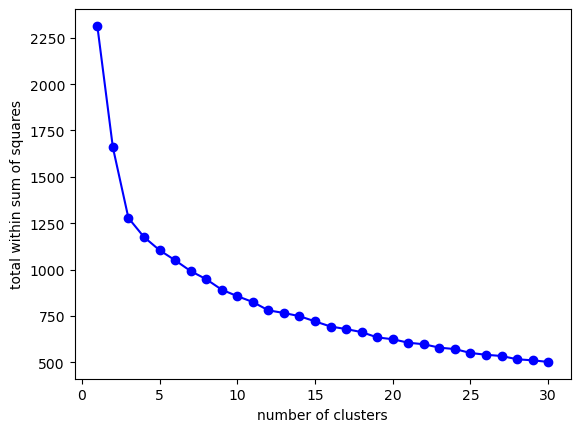

In [26]:
fig, ax = plt.subplots()

ax.plot( K, tots_within, 'bo-' )
ax.set_xlabel('number of clusters')
ax.set_ylabel('total within sum of squares')

plt.show()

## Hierarchical clustering

Hierarchical clustering still bases SIMILARITY on DISTANCES.

But, we **do not** need to specify the number of clusters upfront!

Instead, as the name states, clusters WITHIN clusters are formed!!!!

Hierarchical clustering will in effect try out ALL possible number of clusters for us!!!!!!!

And it provides a useful VISUALIZATION to interpret the clustering results!!!!

We will use sklearn quite often in this course, but for hierarchical clustering will use functions from SCIPY.

Import the function we need from SCIPY.

In [27]:
from scipy.cluster import hierarchy

Hierarchical clustering still calculates distances. Therefore it is critical to use STANDARDIZED variables just like KMeans!!!!

But, there is another kind of distance that needs calculated for Hierarchical clustering.

We will discuss that other kind of distance after examining some results.

This other kind of distance is referred to as the LINKAGE.

### Complete linkage

In [28]:
hclust_complete = hierarchy.complete( Xwine )

In [29]:
type( hclust_complete )

numpy.ndarray

Visualize the results with a specialized figure called a DENDROGRAM.

This presents the clustering results in a TREE LIKE structure.

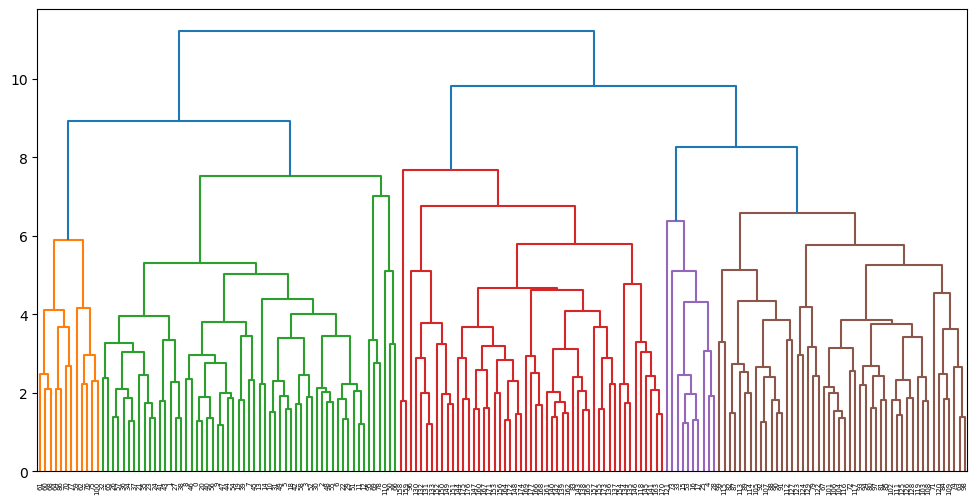

In [31]:
fig = plt.figure(figsize=(12, 6))

dn = hierarchy.dendrogram( hclust_complete )

plt.show()

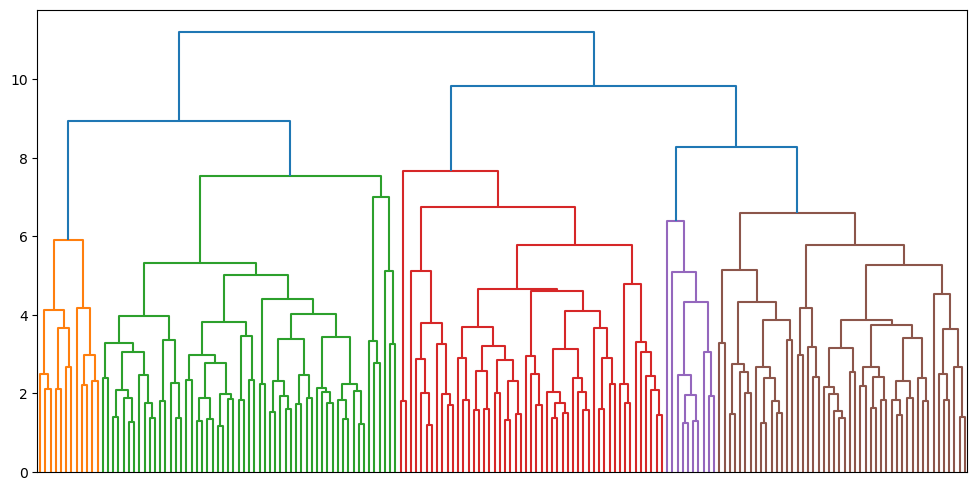

In [32]:
fig = plt.figure(figsize=(12, 6))

dn = hierarchy.dendrogram( hclust_complete, no_labels=True )

plt.show()

### Single linkage

In [33]:
hclust_single = hierarchy.single( Xwine )

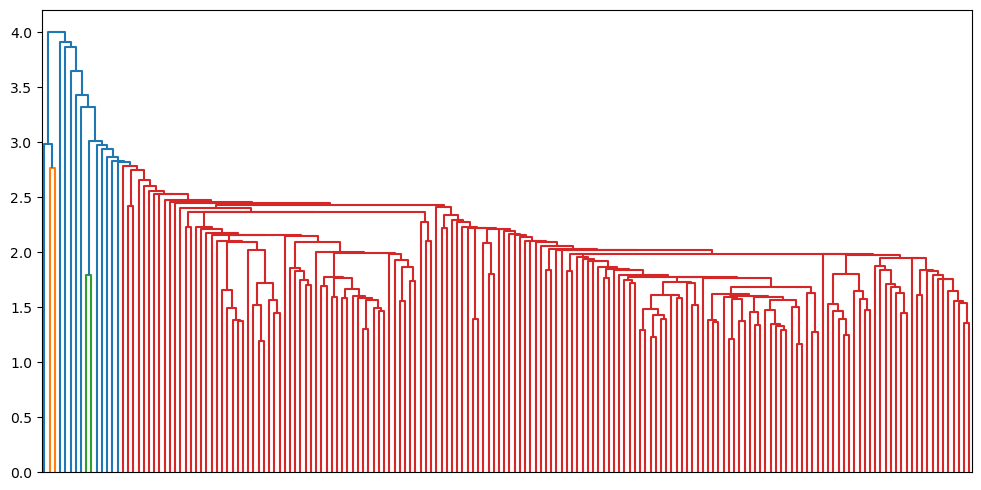

In [34]:
fig = plt.figure(figsize=(12, 6))

dn = hierarchy.dendrogram( hclust_single, no_labels=True )

plt.show()

### Average linkage

In [35]:
hclust_average = hierarchy.average( Xwine )

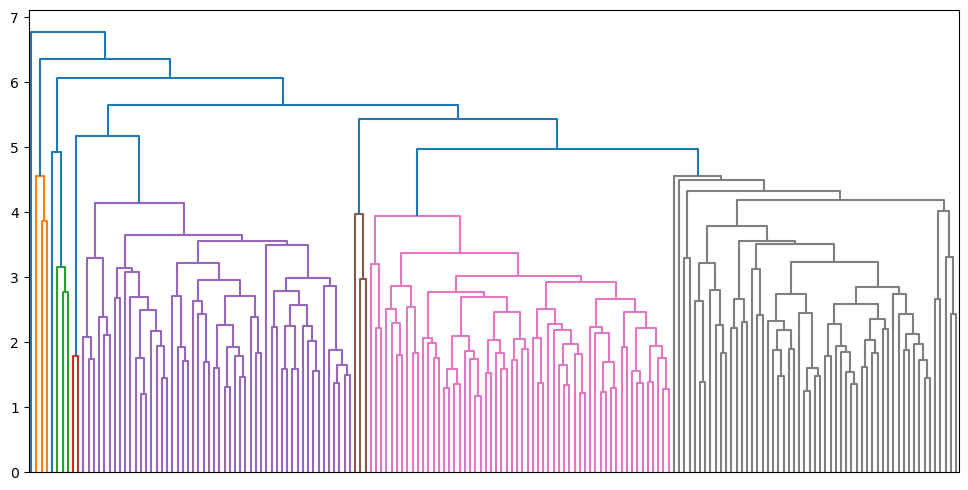

In [36]:
fig = plt.figure(figsize=(12, 6))

dn = hierarchy.dendrogram( hclust_average, no_labels=True )

plt.show()

### Centroid linkage

In [37]:
hclust_centroid = hierarchy.centroid( Xwine )

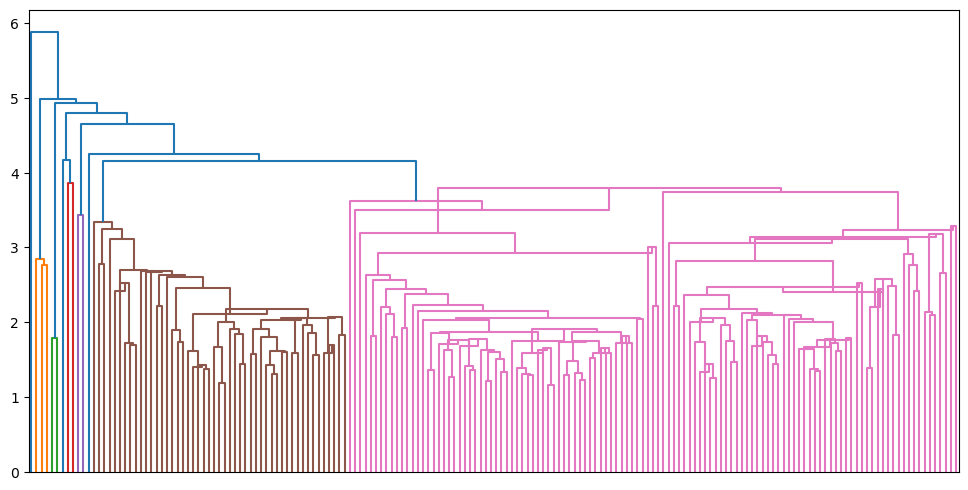

In [38]:
fig = plt.figure(figsize=(12, 6))

dn = hierarchy.dendrogram( hclust_centroid, no_labels=True )

plt.show()

### Ward method

In [39]:
hclust_ward = hierarchy.ward( Xwine )

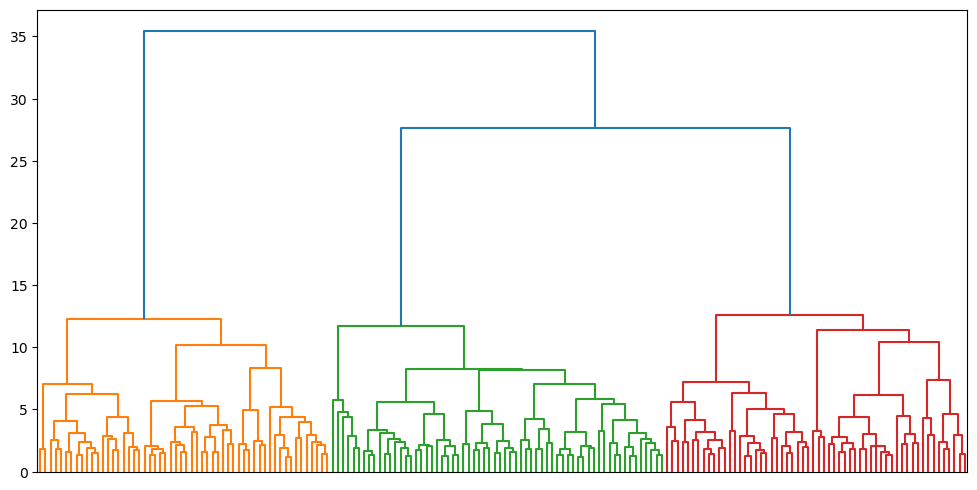

In [40]:
fig = plt.figure(figsize=(12, 6))

dn = hierarchy.dendrogram( hclust_ward, no_labels=True )

plt.show()

## Cut the tree

One approach is to CUT based on a HEIGHT.

In [46]:
hierarchy.cut_tree( hclust_ward, height=25).ravel().shape

(178,)

In [47]:
np.unique( hierarchy.cut_tree( hclust_ward, height=25).ravel() )

array([0, 1, 2])

In [48]:
np.unique( hierarchy.cut_tree( hclust_ward, height=20).ravel() )

array([0, 1, 2])

In [49]:
np.unique( hierarchy.cut_tree( hclust_ward, height=15).ravel() )

array([0, 1, 2])

In [50]:
np.unique( hierarchy.cut_tree( hclust_ward, height=12).ravel() )

array([0, 1, 2, 3, 4])

In [51]:
np.unique( hierarchy.cut_tree( hclust_ward, height=10).ravel() )

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

A second approach is to specify the NUMBER OF CLUSTERS you wish to return.

In [52]:
hierarchy.cut_tree( hclust_ward, n_clusters=3 ).ravel()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 1, 1, 0,
       0, 1, 2, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [53]:
np.unique( hierarchy.cut_tree( hclust_ward, n_clusters=3).ravel() )

array([0, 1, 2])

## Use the cluster results

We can do the same actions on the hierarchical clustering results that we did with KMeans!

In [54]:
pca_wine_df['hclust_3'] = pd.Series( hierarchy.cut_tree( hclust_ward, n_clusters=3 ).ravel(),
                                     index=pca_wine_df.index ).astype('category')

In [56]:
pca_wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   pc01      178 non-null    float64 
 1   pc02      178 non-null    float64 
 2   hclust_3  178 non-null    category
dtypes: category(1), float64(2)
memory usage: 3.2 KB


You should always COUNT the number of observations in each cluster.

In [57]:
pca_wine_df.hclust_3.value_counts()

0    64
1    58
2    56
Name: hclust_3, dtype: int64

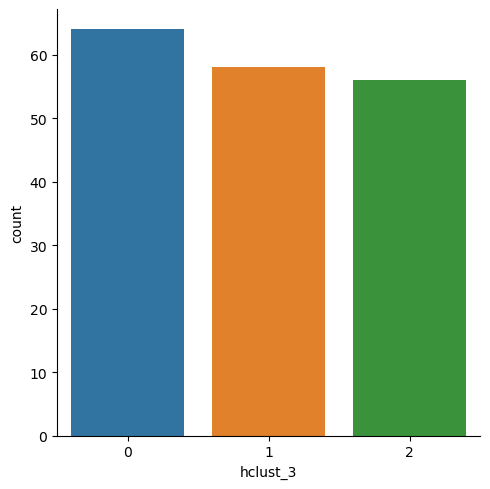

In [58]:
sns.catplot(data = pca_wine_df, x='hclust_3', kind='count')

plt.show()

Let's color the PCA scatter plot between PC01 and PC02 by the identified cluster groups!

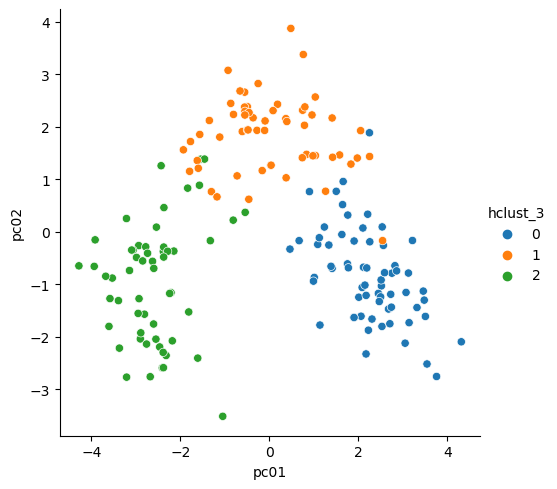

In [59]:
sns.relplot(data = pca_wine_df, x='pc01', y='pc02', hue='hclust_3')

plt.show()

You should always COMPARE the identified clusters to the KNOWN categories.

In [60]:
pca_wine_df['Cultivar'] = wine_data.Cultivar

In [61]:
pca_wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   pc01      178 non-null    float64 
 1   pc02      178 non-null    float64 
 2   hclust_3  178 non-null    category
 3   Cultivar  178 non-null    category
dtypes: category(2), float64(2)
memory usage: 3.5 KB


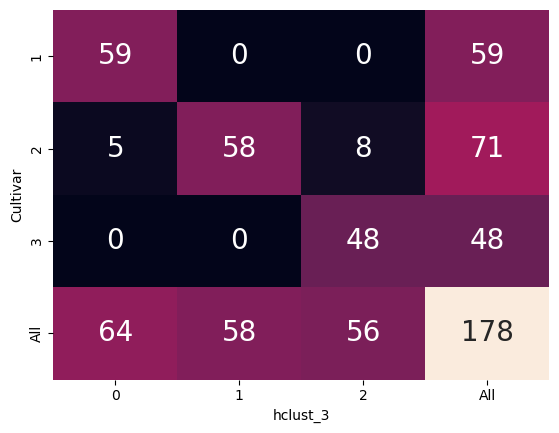

In [63]:
fig, ax = plt.subplots()

sns.heatmap(data = pd.crosstab( pca_wine_df.Cultivar, pca_wine_df.hclust_3, margins=True ),
            annot=True, annot_kws={'fontsize': 20}, fmt='g', 
            cbar=False,
            ax=ax)

plt.show()

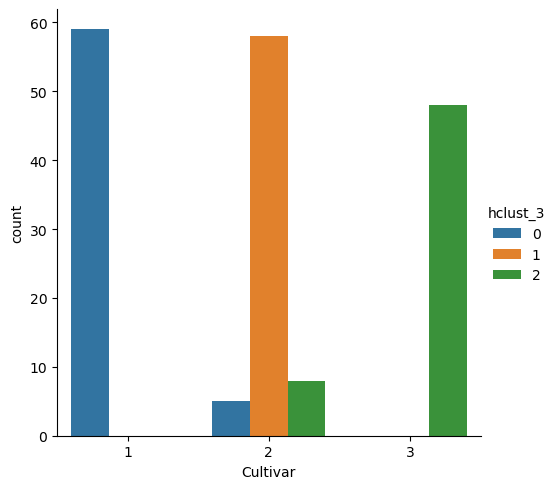

In [64]:
sns.catplot(data = pca_wine_df, x='Cultivar', hue='hclust_3', kind='count')

plt.show()

## Explore the original features

Let's examine the CONDITIONAL DISTRIBUTIONS of the original wine numeric columns GIVEN the clusters!

In [65]:
wine_copy = wine_data.copy()

In [66]:
wine_copy['hclust_3'] = pca_wine_df.hclust_3

In [67]:
wine_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Cultivar              178 non-null    category
 1   Alcohol               178 non-null    float64 
 2   Malic_acid            178 non-null    float64 
 3   Ash                   178 non-null    float64 
 4   Alcalinity_of_ash     178 non-null    float64 
 5   Magnesium             178 non-null    int64   
 6   Total_phenols         178 non-null    float64 
 7   Flavanoids            178 non-null    float64 
 8   Nonflavanoid_phenols  178 non-null    float64 
 9   Proanthocyanin        178 non-null    float64 
 10  Color_intensity       178 non-null    float64 
 11  Hue                   178 non-null    float64 
 12  OD280_OD315           178 non-null    float64 
 13  Proline               178 non-null    int64   
 14  hclust_3              178 non-null    category
dtypes: cat

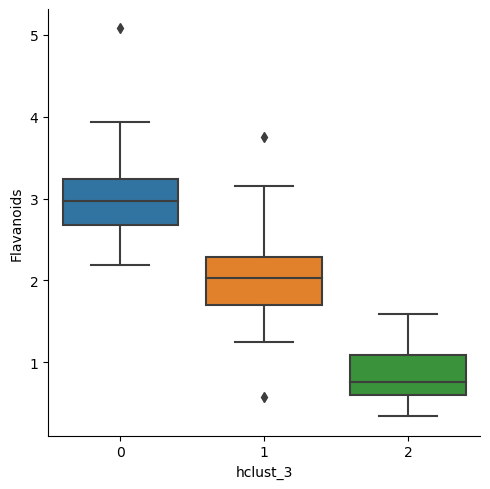

In [68]:
sns.catplot(data = wine_copy, x='hclust_3', y='Flavanoids', kind='box')

plt.show()

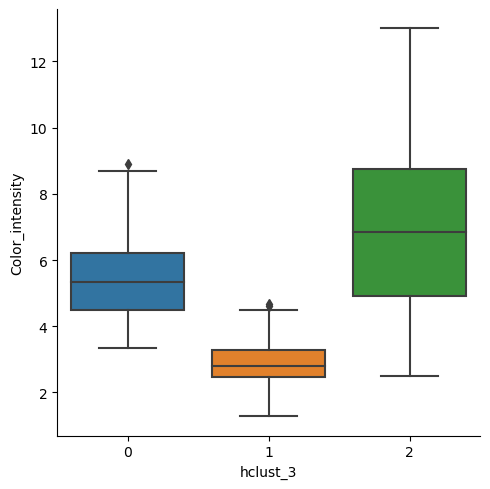

In [69]:
sns.catplot(data = wine_copy, x='hclust_3', y='Color_intensity', kind='box')

plt.show()

Reshaped the WIDE FORMAT to LONG FORMAT to enable exploring ALL of the original variables GROUPED BY the clusters!

In [70]:
lf = wine_copy.reset_index().\
rename(columns={'index': 'rowid'}).\
melt(id_vars=['rowid', 'Cultivar', 'hclust_3'],
     value_vars=wine_features.columns)

In [71]:
lf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2314 entries, 0 to 2313
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   rowid     2314 non-null   int64   
 1   Cultivar  2314 non-null   category
 2   hclust_3  2314 non-null   category
 3   variable  2314 non-null   object  
 4   value     2314 non-null   float64 
dtypes: category(2), float64(1), int64(1), object(1)
memory usage: 59.1+ KB


In [72]:
lf

,rowid,Cultivar,hclust_3,variable,value
0,0,1,0,Alcohol,14.23
1,1,1,0,Alcohol,13.20
2,2,1,0,Alcohol,13.16
3,3,1,0,Alcohol,14.37
4,4,1,0,Alcohol,13.24
...,...,...,...,...,...
2309,173,3,2,Proline,740.00
2310,174,3,2,Proline,750.00
2311,175,3,2,Proline,835.00
2312,176,3,2,Proline,840.00


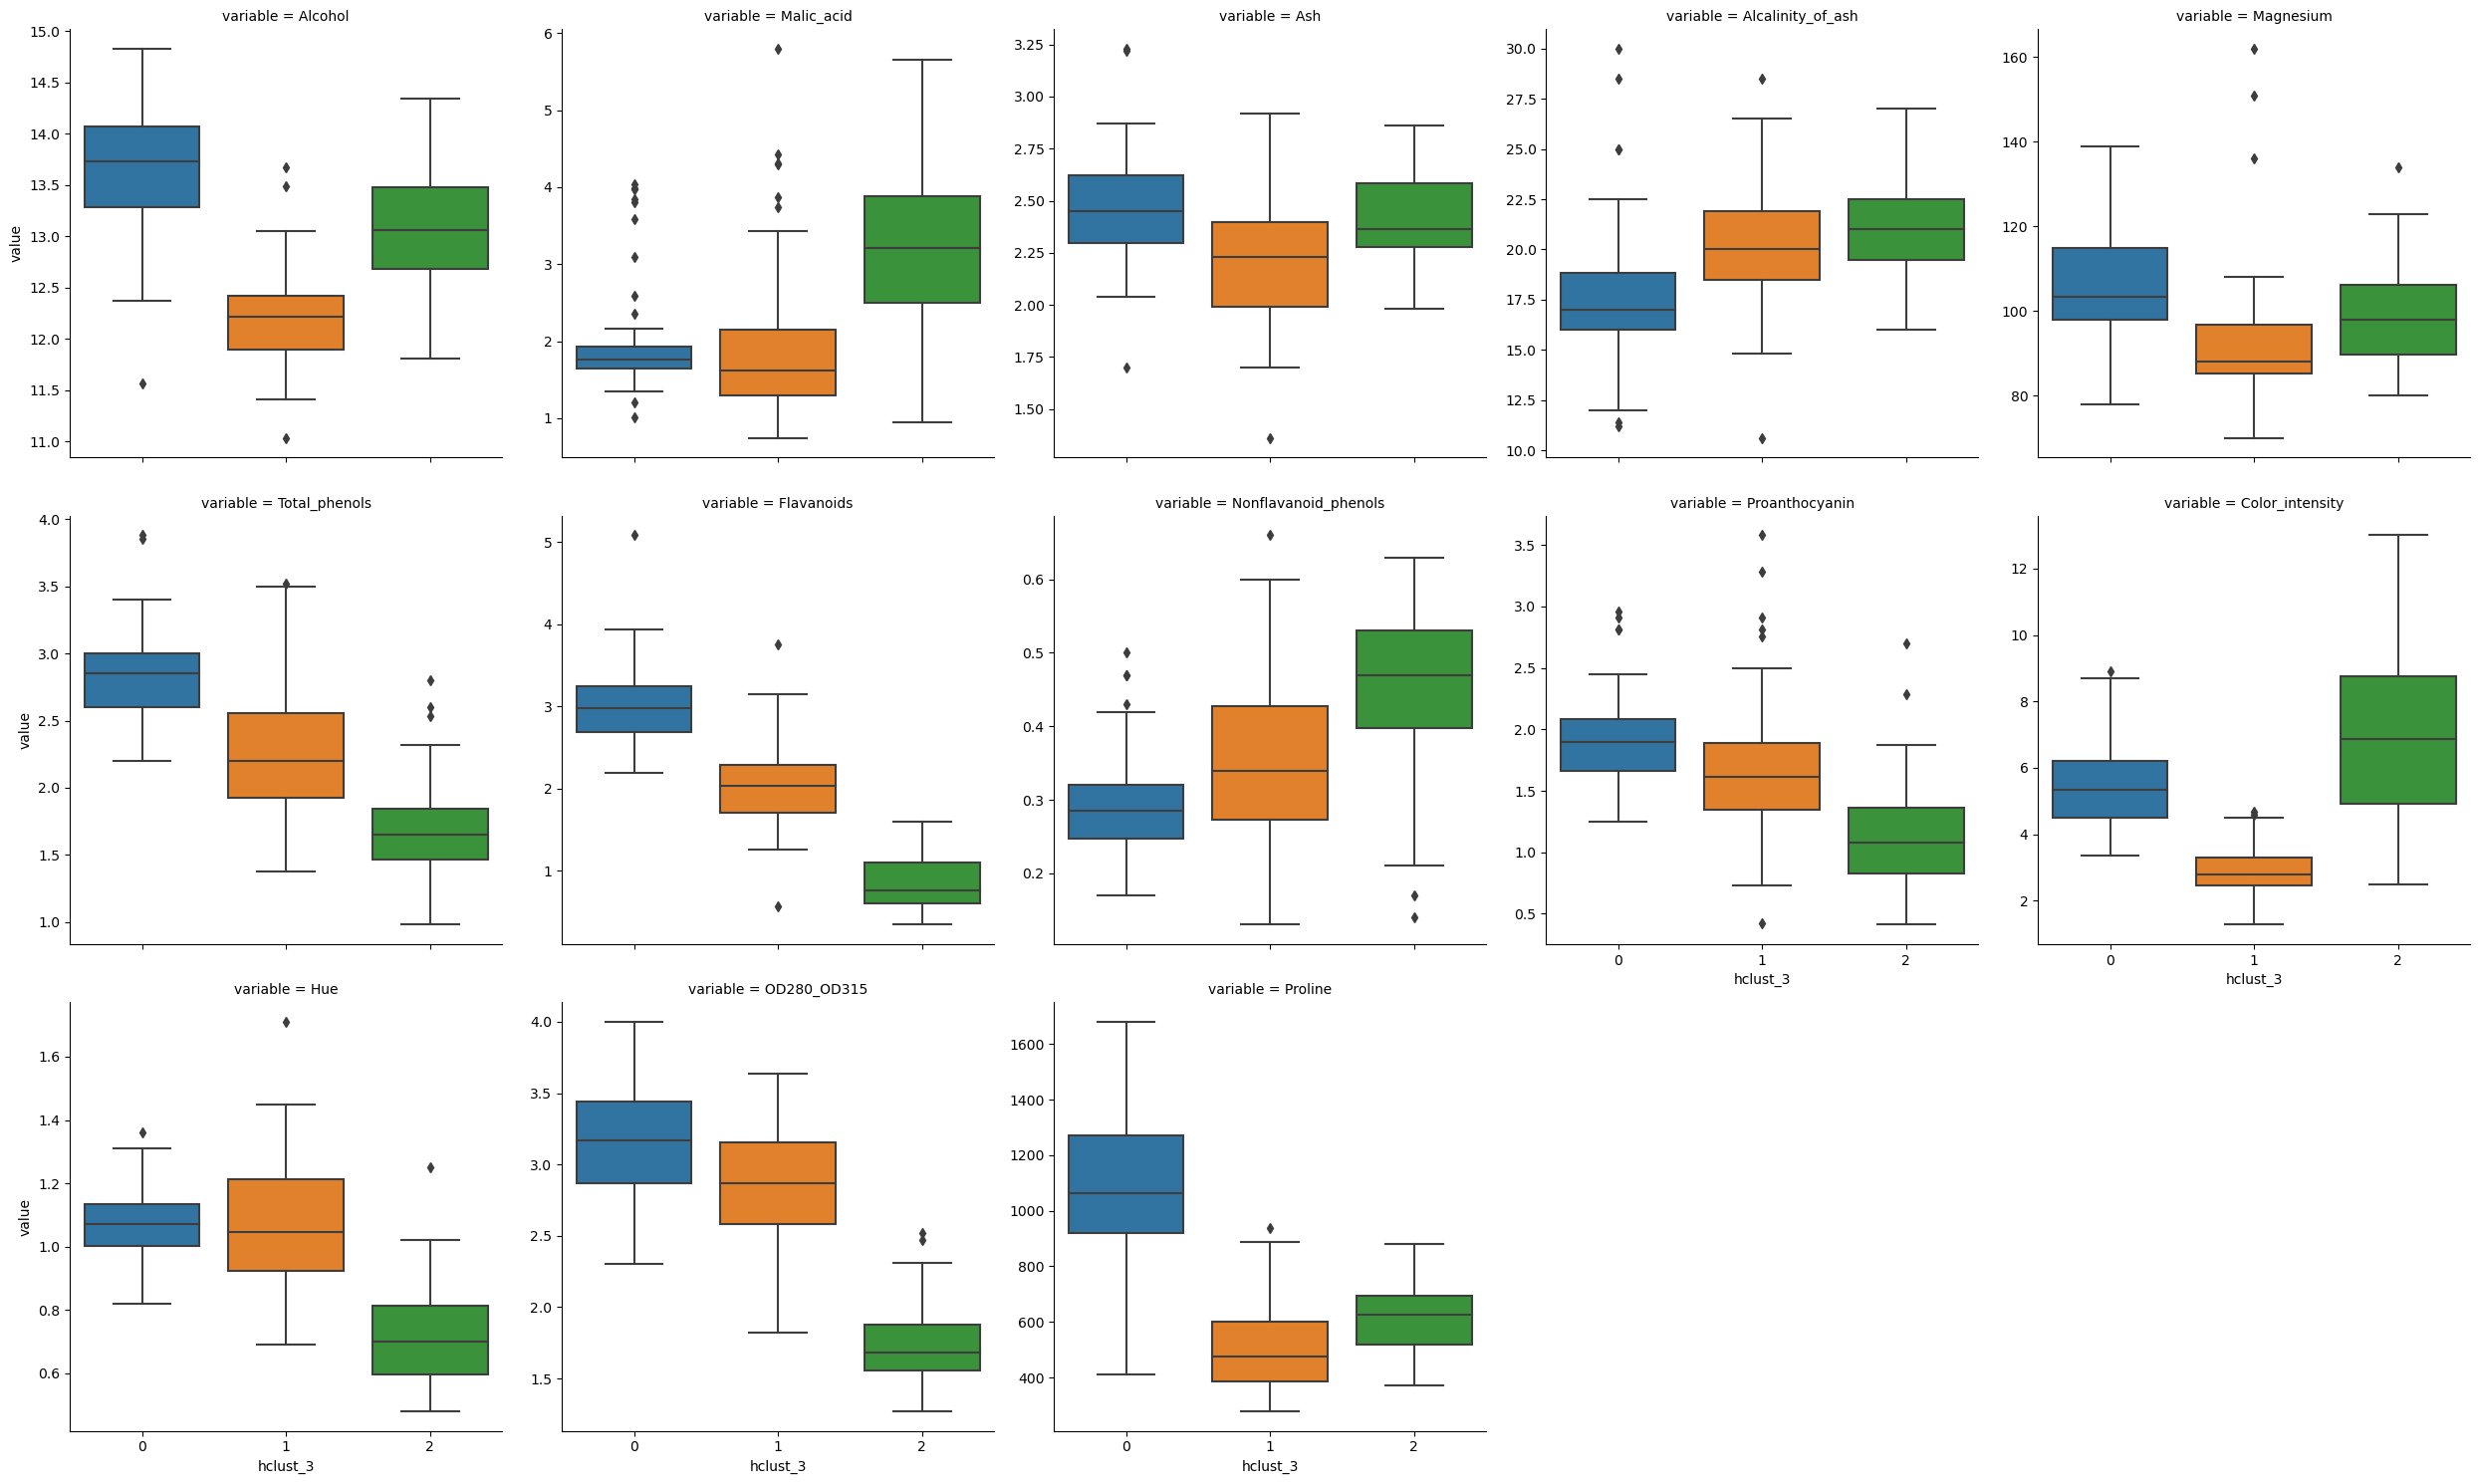

In [73]:
sns.catplot(data = lf, x='hclust_3', y='value', col='variable', col_wrap=5,
            kind='box',
            sharey=False)

plt.show()